## Дополнительный проект

В данном проекте вы поработаете с довольно нетипичными для аналитика данными: gff файлом, который описывает геном мухи. При его выполнении вам может понадобиться часть конспекта про работу со строковыми данными, а именно – про строковые методы серий.

## Задачи

1. Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x  
2. Выясните, какое из этих значений является самым частым  
3. Постройте распределение встречаемости значений в столбце type

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 1

Какое значение атрибута Parent самое частое?

In [4]:
gff = pd.read_csv('gff.tsv', sep='\t')

In [5]:
gff.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [8]:
pattern = r'Parent=(?P<parent>[\w\.]+)'

In [9]:
parent = gff.attributes.str.extract(pattern)

In [10]:
parent

,parent
0,XM_001475631.1
1,XM_001475631.1
2,XM_001475631.1
3,XM_001475631.1
4,XM_001475631.1
...,...
507,XM_001475631.1
508,XM_001475631.1
509,XM_001475631.1
510,XM_001475631.1


In [11]:
parent.parent.value_counts()

XM_001475631.1    479
NC_000083.5        33
Name: parent, dtype: int64

### 2

Построить распределение встречаемости значений в столбце type

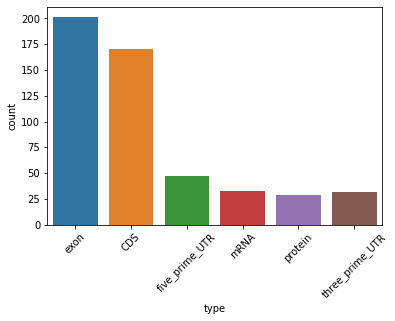

In [12]:
fig, ax = plt.subplots()
sns.countplot(data=gff, x='type', ax=ax)
ax.tick_params(axis='x', rotation=45)